In [3]:
%pip install -q seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSVs
sort_df = pd.read_csv("1_sort/trajectory_data_sort.csv")
deep_df = pd.read_csv("2_deepsort/trajectory_data_deepsort.csv")
yolo_df = pd.read_csv("3_yolov8/trajectory_data_yolov8.csv")

# Set Seaborn style
sns.set(style="whitegrid")

# --- Tracking Accuracy ---
# Number of unique IDs assigned during tracking
unique_counts = {
    "SORT": sort_df["id"].nunique(),
    "Deep SORT": deep_df["id"].nunique(),
    "YOLOv8": yolo_df["id"].nunique()
}

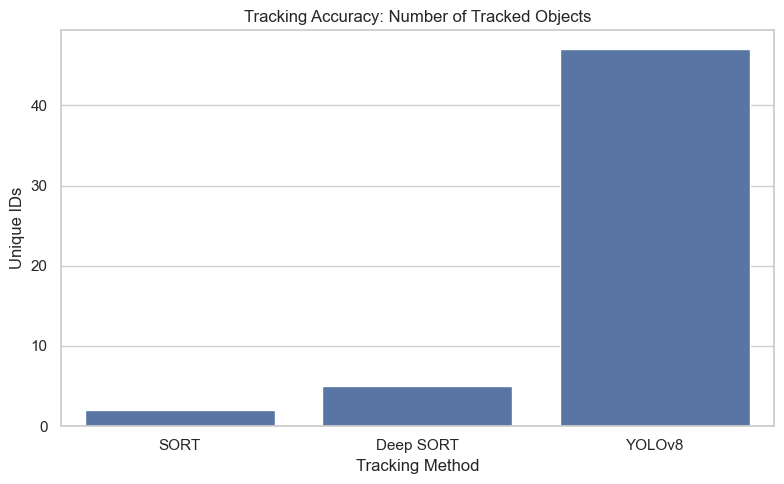

In [5]:
unique_df = pd.DataFrame(list(unique_counts.items()), columns=["Method", "Unique Objects"])

plt.figure(figsize=(8, 5))
sns.barplot(data=unique_df, x="Method", y="Unique Objects")
plt.title("Tracking Accuracy: Number of Tracked Objects")
plt.ylabel("Unique IDs")
plt.xlabel("Tracking Method")
plt.tight_layout()
plt.show()

# Explanation:
# Tracking accuracy reflects how many distinct object IDs each method assigned.
# A higher number may indicate better object detection or more false positives.


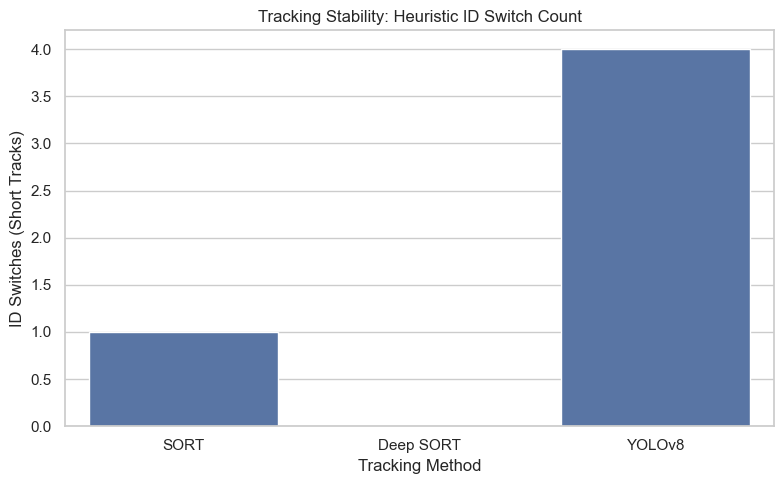

In [6]:
# --- ID Switches (simplified heuristic) ---
def compute_id_switches(df):
    id_frame_counts = df.groupby("id")["frame"].nunique()
    return id_frame_counts[id_frame_counts < 3].count()  # Consider short-lived IDs as switches

id_switches = {
    "SORT": compute_id_switches(sort_df),
    "Deep SORT": compute_id_switches(deep_df),
    "YOLOv8": compute_id_switches(yolo_df)
}

switch_df = pd.DataFrame(list(id_switches.items()), columns=["Method", "ID Switches"])

plt.figure(figsize=(8, 5))
sns.barplot(data=switch_df, x="Method", y="ID Switches")
plt.title("Tracking Stability: Heuristic ID Switch Count")
plt.ylabel("ID Switches (Short Tracks)")
plt.xlabel("Tracking Method")
plt.tight_layout()
plt.show()

# Explanation:
# Short-lived IDs (appearing < 3 frames) may indicate unstable tracking or frequent ID changes.


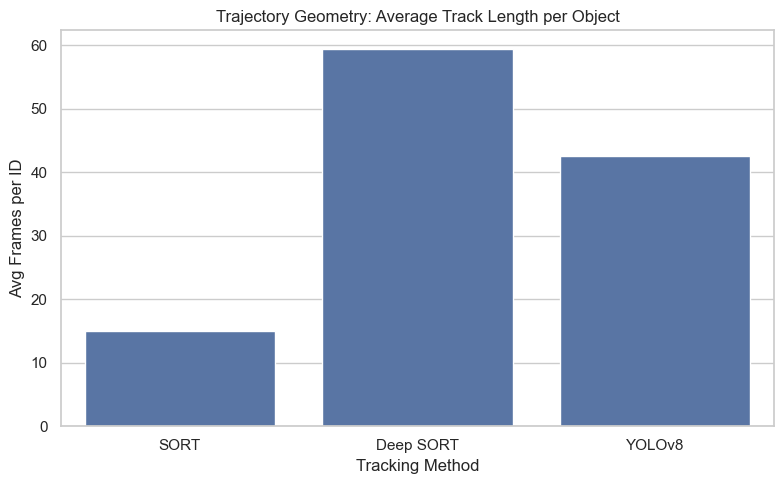

In [7]:
# --- Average Trajectory Length (frames per ID) ---
def compute_avg_track_length(df):
    return df.groupby("id")["frame"].nunique().mean()

avg_track_lengths = {
    "SORT": compute_avg_track_length(sort_df),
    "Deep SORT": compute_avg_track_length(deep_df),
    "YOLOv8": compute_avg_track_length(yolo_df)
}

avg_track_df = pd.DataFrame(list(avg_track_lengths.items()), columns=["Method", "Avg Track Length"])

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_track_df, x="Method", y="Avg Track Length")
plt.title("Trajectory Geometry: Average Track Length per Object")
plt.ylabel("Avg Frames per ID")
plt.xlabel("Tracking Method")
plt.tight_layout()
plt.show()

# Explanation:
# This metric reflects how long each ID remains tracked, showing the continuity and geometric consistency.


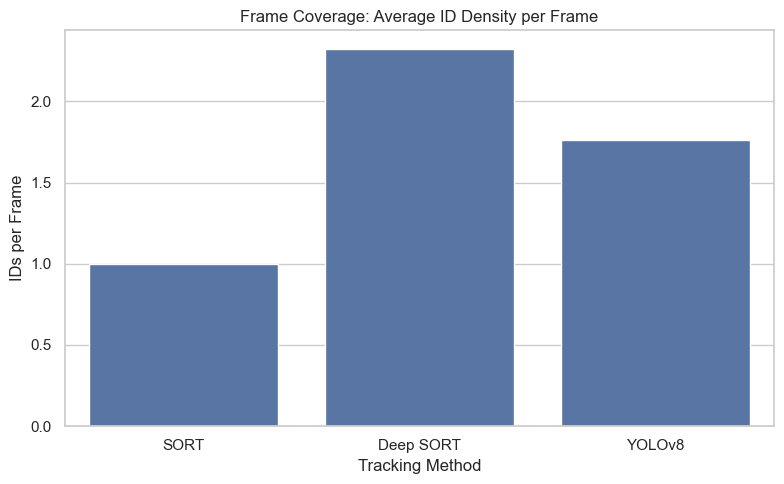

In [8]:
# --- ID Density: Number of Objects per Frame ---
def compute_id_density(df):
    return df.groupby("frame")["id"].nunique().mean()

density_vals = {
    "SORT": compute_id_density(sort_df),
    "Deep SORT": compute_id_density(deep_df),
    "YOLOv8": compute_id_density(yolo_df)
}

density_df = pd.DataFrame(list(density_vals.items()), columns=["Method", "Avg IDs per Frame"])

plt.figure(figsize=(8, 5))
sns.barplot(data=density_df, x="Method", y="Avg IDs per Frame")
plt.title("Frame Coverage: Average ID Density per Frame")
plt.ylabel("IDs per Frame")
plt.xlabel("Tracking Method")
plt.tight_layout()
plt.show()

# Explanation:
# Indicates how many objects are being tracked at each time step. Useful for understanding how busy the scene appears to each model.



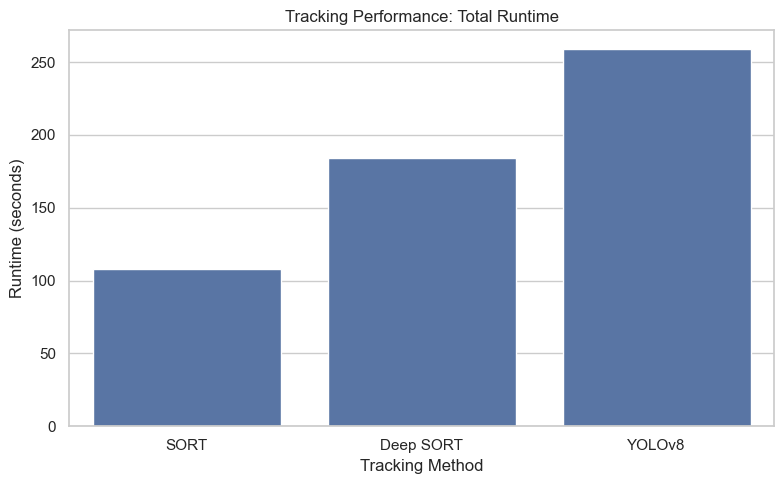

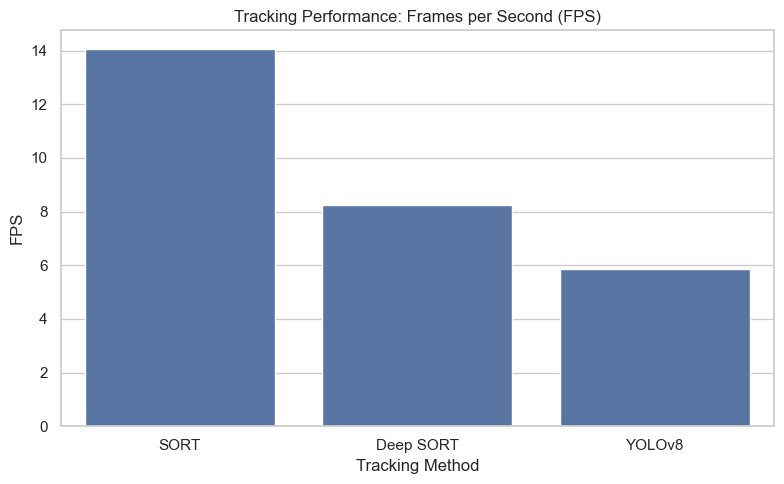

Performance Metrics (from external logs):
   Method  Runtime (s)   FPS
     SORT       107.71 14.05
Deep SORT       183.95  8.23
   YOLOv8       258.87  5.84


In [13]:
# --- Performance Logging Section ---
import os


performance_data = []

for method, path in [
    ("SORT", "1_sort/sort_performance.txt"),
    ("Deep SORT", "2_deepsort/deepsort_performance.txt"),
    ("YOLOv8", "3_yolov8/yolov8_performance.txt")
]:
    if os.path.exists(path):
        with open(path, "r") as f:
            lines = f.readlines()
            runtime = float(lines[0].strip()) if lines else None
            fps = float(lines[1].strip()) if len(lines) > 1 else None
            performance_data.append((method, runtime, fps))

if performance_data:
    perf_df = pd.DataFrame(performance_data, columns=["Method", "Runtime (s)", "FPS"])

    # Runtime chart
    plt.figure(figsize=(8, 5))
    sns.barplot(data=perf_df, x="Method", y="Runtime (s)")
    plt.title("Tracking Performance: Total Runtime")
    plt.ylabel("Runtime (seconds)")
    plt.xlabel("Tracking Method")
    plt.tight_layout()
    plt.show()

    # FPS chart
    plt.figure(figsize=(8, 5))
    sns.barplot(data=perf_df, x="Method", y="FPS")
    plt.title("Tracking Performance: Frames per Second (FPS)")
    plt.ylabel("FPS")
    plt.xlabel("Tracking Method")
    plt.tight_layout()
    plt.show()

    print("Performance Metrics (from external logs):")
    print(perf_df.to_string(index=False))
else:
    print("No external performance logs found. Please create e.g. 'sort_performance.txt' with runtime and fps on separate lines.")
